## Plot a Graph

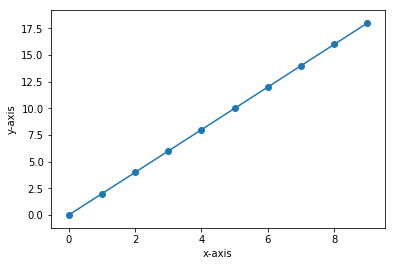

In [1]:
import matplotlib.pyplot as plt

x = [i for i in range(10)]
y = [2*i for i in range(10)]

plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.plot(x, y)
plt.scatter(x, y)
plt.show()

## Train Test Split

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

#Loading the iris dataset
iris = datasets.load_iris()

#split it in features and labels
X = iris.data
y = iris.target

classes = ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica']

print(X.shape)
print(y.shape, "\n")

#hours of studying vs good/bad grades
#10 different stidents
#train a model with 8 students
#predict with the remaining 2
#level of accuruarcy of our model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("X_train-", X_train.shape)
print("X_test-", X_test.shape)
print("y_train-", y_train.shape)
print("y_test-", y_test.shape)

(150, 4)
(150,) 

X_train- (120, 4)
X_test- (30, 4)
y_train- (120,)
y_test- (30,)


## KNN Classifier

In [3]:
import numpy as np
import pandas as pd
from sklearn import neighbors, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from matplotlib import pyplot as plt

data = pd.read_csv('car.csv')
print(data.head())

X = data[['buying', 'maint', 'safety']].values
y = data[['class']]

print('\n', X)

#converting 'X' data from strings to int using Label Encoder

Le = LabelEncoder()
for i in range(len(X[0])):
    X[:, i] = Le.fit_transform(X[:, i])

print("\n After Conversion-")
print(X)

#converting 'y' data using Mapping

label_mapping = {
                    'unacc':0,
                    'acc':1,
                    'good':2,
                    'vgood':3
                }

#Alternate method
#y['class'] = y['class'].map(label_mapping)

y.replace({"class": label_mapping}, inplace = True)

y = np.array(y)
print(y)

#create model
print("\n Shape:")
print(X.shape)
print(y.shape)

knn = svm.SVC()

#knn = neighbors.KNeighborsClassifier("n_neighbors = 25, weight = "uniform)
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, shuffle = True, stratify = y)
knn.fit(X_train, y_train.ravel())

prediction = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction)

print("Predictions:", prediction)
#print("actual: ", y_test)
print("Accuracy: ", accuracy)

for a in range(100, 102):
    print("Actual value ", y[a])
    print("Predicted value", knn.predict(X)[a])

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

 [['vhigh' 'vhigh' 'low']
 ['vhigh' 'vhigh' 'med']
 ['vhigh' 'vhigh' 'high']
 ...
 ['low' 'low' 'low']
 ['low' 'low' 'med']
 ['low' 'low' 'high']]

 After Conversion-
[[3 3 1]
 [3 3 2]
 [3 3 0]
 ...
 [1 1 1]
 [1 1 2]
 [1 1 0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [2]
 [3]]

 Shape:
(1728, 3)
(1728, 1)
Predictions: [0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\generic.py:3855: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


Predicted value 0


## SVM (contd. from train test split code)

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()

#split it in features and labels
X = iris.data
y = iris.target

classes = ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("X_train-", X_train.shape)
print("X_test-", X_test.shape)
print("y_train-", y_train.shape)
print("y_test-", y_test.shape)

model = svm.SVC()
model.fit(X_train, y_train)

print(model, "\n")

predictions = model.predict(X_test)
acc = accuracy_score(y_test, predictions)

print("Predictions: ", predictions)
print("actual: ", y_test)
print("Accuracy: ", acc)
print("")

for i in range(len(predictions)):
    print(classes[predictions[i]])

X_train- (120, 4)
X_test- (30, 4)
y_train- (120,)
y_test- (30,)
SVC() 

Predictions:  [2 0 2 0 1 0 2 0 0 2 1 1 2 1 1 2 0 2 2 1 2 2 2 1 1 2 1 2 2 1]
actual:  [1 0 2 0 1 0 2 0 0 2 1 1 2 1 1 2 0 2 2 1 2 2 2 1 1 2 1 2 2 1]
Accuracy:  0.9666666666666667

Iris Virginica
Iris Setosa
Iris Virginica
Iris Setosa
Iris Versicolour
Iris Setosa
Iris Virginica
Iris Setosa
Iris Setosa
Iris Virginica
Iris Versicolour
Iris Versicolour
Iris Virginica
Iris Versicolour
Iris Versicolour
Iris Virginica
Iris Setosa
Iris Virginica
Iris Virginica
Iris Versicolour
Iris Virginica
Iris Virginica
Iris Virginica
Iris Versicolour
Iris Versicolour
Iris Virginica
Iris Versicolour
Iris Virginica
Iris Virginica
Iris Versicolour


## Linear Regression

X
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]] 

(506, 13)
y
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19

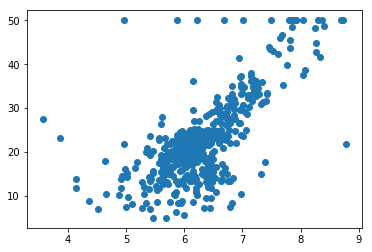


 Predictions:  [18.57040248 16.10150855 31.16197758 21.04170849 17.38360429 18.62421509
 12.56028945 25.01198585 13.25934902 16.79309578 31.00239795 34.11610156
 14.48247543 18.69129256 39.36920256  5.66115599 16.82861851 23.50892196
 17.30881636 19.02070262 33.64603269 24.12598457  7.05635426  6.72504813
 23.80661864 15.47043299 23.64612505 32.08310305 32.68688651  6.05646251
 14.32811196 17.4142222  18.12156581 23.313035   12.60021556 31.29637911
 19.50662984  1.5949903  16.97146244 22.8964129  16.89854195 18.50156794
 37.07802181 12.14687316 14.56997929 15.55923608 22.8984053  31.35492222
 24.77233763  1.73624138 22.36990689 18.83330354 34.6662383  17.62255606
 31.74438549 18.80734615 20.20040667 16.79928987 20.02883214 11.06027665
 25.24100455 20.4521711  20.08014272 42.18765888 25.27658769 16.32404179
  2.66511375 18.94269628 14.99830015 20.95659264 19.66121414 28.64813713
 13.43321067  9.69967069 21.663244   35.69872214 38.36953214 20.50420901
 26.28779588 33.32315114 34.8836405

In [5]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

boston = datasets.load_boston()

#featres / labels
X = boston.data
y = boston.target

print("X")
print(X, '\n')
print(X.shape)

print("y")
print(y, '\n')
print(y.shape)

#algorithm
l_reg = linear_model.LinearRegression()

print("\n Plot")
plt.scatter(X.T[5], y)    #T stands for transpose (so that only 1 feature is considered)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#train
model = l_reg.fit(X_train, y_train)

predictions = model.predict(X_test)
#acc = accuracy_score(y_test, predictions)

print("\n Predictions: ", predictions)
print("\n Actual: ", y_test)
print("")

print("R^2: ", l_reg.score(X, y))

# What is score?
# The coefficient R^2 is defined as (1-u/v) where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() 
# and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum()

print("coeff: ", l_reg.coef_)
print("intercept: ", l_reg.intercept_)

## Kmeans Example

In [6]:
# -*- coding: utf-8 -*-
"""Untitled2.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1aK5P9sD9vLwrY_tyzrIUtz8IsmJOYbwF
"""

from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
import pandas as pd

bc = load_breast_cancer()
print(bc, "\n")

X = scale(bc.data)    #Scaling data as originally large difference in values
print("Scaled Data \n", X)

y = bc.target
#print("y \n", y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = KMeans(n_clusters=2, random_state=0)    #random state = 0 helps in debugging

model.fit(X_train)

predictions = model.predict(X_test)

labels = model.labels_

print("Labels: ", labels)
print("Predictions: ", predictions)
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Actual: ", y_test)

print(pd.crosstab(y_train, labels))

from sklearn import metrics

# Commented out IPython magic to ensure Python compatibility.
def bench_k_means(estimator, name, data):
    estimator.fit(data)
    print('%-9s\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
           % (name, estimator.inertia_,
             metrics.homogeneity_score(y, estimator.labels_),
             metrics.completeness_score(y, estimator.labels_),
             metrics.v_measure_score(y, estimator.labels_),
             metrics.adjusted_rand_score(y, estimator.labels_),
             metrics.adjusted_mutual_info_score(y,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean')))

bench_k_means(model, "1", X)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 